In [ ]:
!pip install shap

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import shap

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
file_path = '/content/drive/My Drive/Cibil/Balanced_Final_Finance.csv'

In [ ]:
df = pd.read_csv(file_path)

In [ ]:
df.head()

,borrower_id,age,gender,education,marital_status,num_dependents,residence_type,income,employment_status,loan_amount,loan_term,interest_rate,credit_score,debt_to_income_ratio,existing_loan_balance,previous_loans,previous_default,loan_purpose,monthly_repayment,risk
0,55303,41,Male,High School,Single,2,Own,12272,Self-Employed,60137,36,3.35,672,0.20,180588,1,1,Car purchase,1296.84,High
1,13387,62,Male,Master,Single,3,Rent,96816,Self-Employed,211548,36,5.94,792,0.28,55482,3,0,Education,12609.72,Low
2,95891,41,Female,PhD,Married,0,Rent,23460,Unemployed,74818,36,4.99,665,0.32,42192,4,0,Home improvement,2530.53,High
3,40856,40,Female,Master,Divorced,1,Rent,54214,Self-Employed,390918,60,6.48,762,0.28,165372,5,0,Car purchase,6294.80,Low
4,82054,43,Male,Bachelor,Single,5,Rent,54775,Employed,152884,36,4.80,751,0.23,92935,2,0,Car purchase,4291.61,Low


In [ ]:
df.isnull().sum()

,0
borrower_id,0
age,0
gender,0
education,0
marital_status,0
num_dependents,0
residence_type,0
income,0
employment_status,0
loan_amount,0


In [ ]:
df.describe()

,borrower_id,age,num_dependents,income,loan_amount,loan_term,interest_rate,credit_score,debt_to_income_ratio,existing_loan_balance,previous_loans,previous_default,monthly_repayment
count,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.00000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,55223.471200,46.552667,2.487200,56310.097333,196558.164933,47.82240,5.213207,735.414800,0.286767,111051.109867,3.045067,0.354667,5913.825720
std,25687.104484,13.342605,1.678991,31643.058702,86959.581763,9.93809,1.487707,46.616131,0.054991,53863.163143,1.420553,0.478444,3193.886338
min,10011.000000,20.000000,0.000000,0.000000,50841.000000,36.00000,3.000000,650.000000,0.200000,10177.000000,1.000000,0.000000,985.550000
25%,33078.250000,36.000000,1.000000,36761.250000,130894.750000,36.00000,3.880000,701.000000,0.240000,65696.750000,2.000000,0.000000,3346.880000
50%,55377.500000,49.000000,3.000000,58985.000000,186498.000000,48.00000,5.060000,750.000000,0.280000,114054.500000,3.000000,0.000000,5166.205000
75%,77240.750000,58.000000,4.000000,79351.750000,252703.250000,60.00000,6.470000,773.000000,0.320000,157872.000000,4.000000,1.000000,8071.092500
max,99994.000000,65.000000,5.000000,119659.000000,398694.000000,60.00000,7.990000,800.000000,0.400000,199858.000000,5.000000,1.000000,12960.020000


In [ ]:
label_encoder = LabelEncoder()

In [ ]:
df['employment_status'] = label_encoder.fit_transform(df['employment_status'])

In [ ]:
df.head()

,borrower_id,age,gender,education,marital_status,num_dependents,residence_type,income,employment_status,loan_amount,loan_term,interest_rate,credit_score,debt_to_income_ratio,existing_loan_balance,previous_loans,previous_default,loan_purpose,monthly_repayment,risk
0,55303,41,Male,High School,Single,2,Own,12272,1,60137,36,3.35,672,0.20,180588,1,1,Car purchase,1296.84,High
1,13387,62,Male,Master,Single,3,Rent,96816,1,211548,36,5.94,792,0.28,55482,3,0,Education,12609.72,Low
2,95891,41,Female,PhD,Married,0,Rent,23460,2,74818,36,4.99,665,0.32,42192,4,0,Home improvement,2530.53,High
3,40856,40,Female,Master,Divorced,1,Rent,54214,1,390918,60,6.48,762,0.28,165372,5,0,Car purchase,6294.80,Low
4,82054,43,Male,Bachelor,Single,5,Rent,54775,0,152884,36,4.80,751,0.23,92935,2,0,Car purchase,4291.61,Low


In [ ]:
selected_features = ['loan_amount', 'employment_status', 'credit_score', 'income', 'debt_to_income_ratio', 'age', 'interest_rate', 'existing_loan_balance', 'previous_default']
X = df[selected_features]
y = df['risk'].map({'Low': 0, 'Medium': 1, 'High': 2})

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
rf_param_grid = {
    'n_estimators': [100, 200, 300],            # More trees may improve performance
    'max_depth': [10, 20, 30, None],            # Wider range for tree depth
    'min_samples_split': [2, 5, 10],            # Controls how deep the tree can grow
    'min_samples_leaf': [1, 2, 4],              # Minimum samples required at each leaf
}

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf, rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train_scaled, y_train)
best_rf = rf_grid.best_estimator_

In [ ]:
xgb_param_grid = {
    'n_estimators': [100, 200, 300],               # Number of boosting rounds
    'max_depth': [3, 5, 7],                        # Tree depth controls complexity
    'learning_rate': [0.01, 0.05, 0.1],            # Learning rate (lower = slower, more precise)
    'subsample': [0.6, 0.8, 1.0],                  # Row sampling to reduce overfitting
    'colsample_bytree': [0.6, 0.8, 1.0],           # Column sampling per tree
}

In [ ]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_grid = GridSearchCV(xgb, xgb_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
xgb_grid.fit(X_train_scaled, y_train)
best_xgb = xgb_grid.best_estimator_

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:24:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
#Predictions
y_pred_rf = best_rf.predict(X_test_scaled)
y_pred_xgb = best_xgb.predict(X_test_scaled)

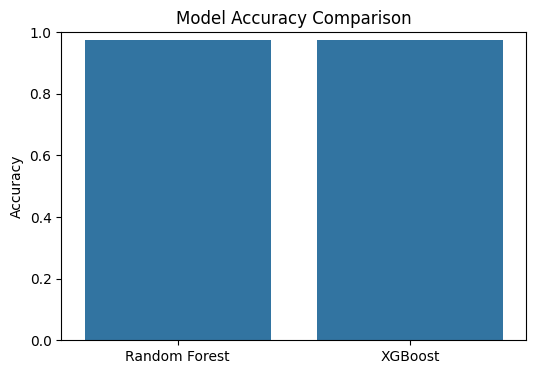

In [ ]:
# Accuracy Bar Plot
models = ['Random Forest', 'XGBoost']
accuracies = [
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_xgb)
]
plt.figure(figsize=(6,4))
sns.barplot(x=models, y=accuracies)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

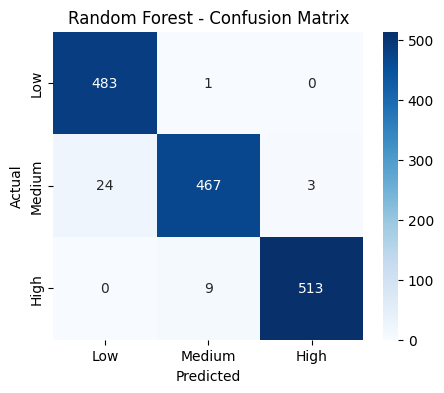

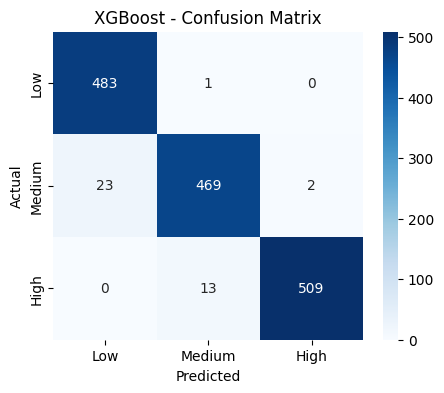

In [ ]:
# Confusion Matrix Plot Function
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Low', 'Medium', 'High'],
                yticklabels=['Low', 'Medium', 'High'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{title} - Confusion Matrix")
    plt.show()

plot_conf_matrix(y_test, y_pred_rf, "Random Forest")
plot_conf_matrix(y_test, y_pred_xgb, "XGBoost")

 95%|=================== | 4272/4500 [00:14<00:00]       


SHAP Beeswarm for class: Low


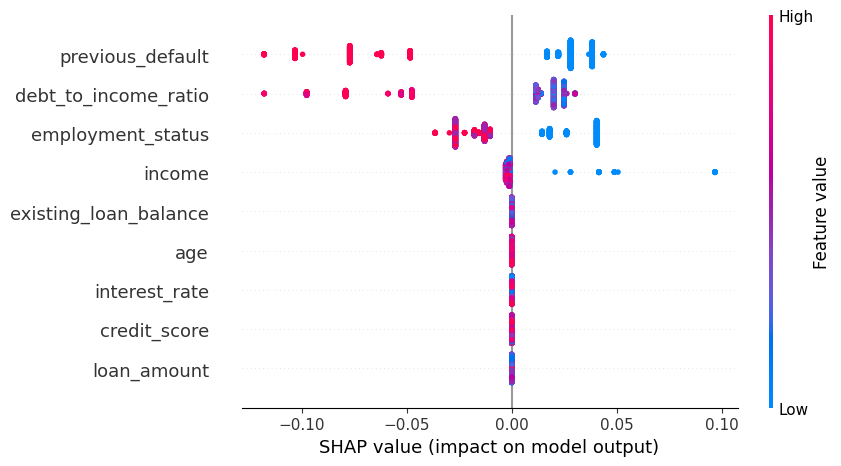


SHAP Beeswarm for class: Medium


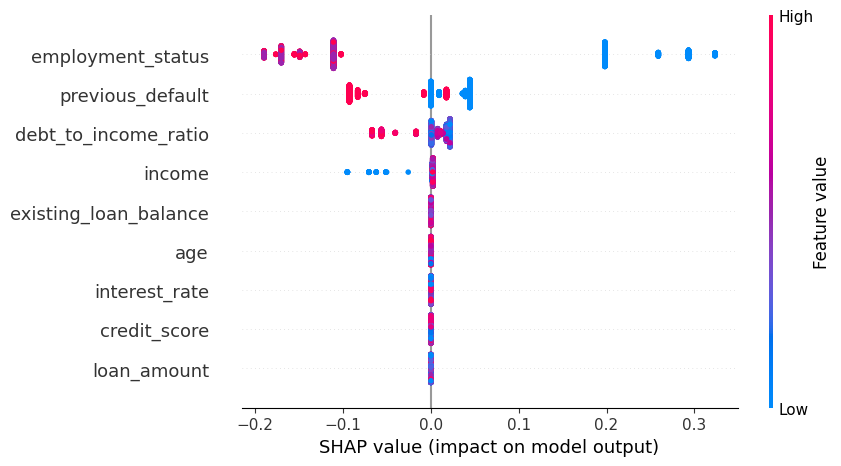


SHAP Beeswarm for class: High


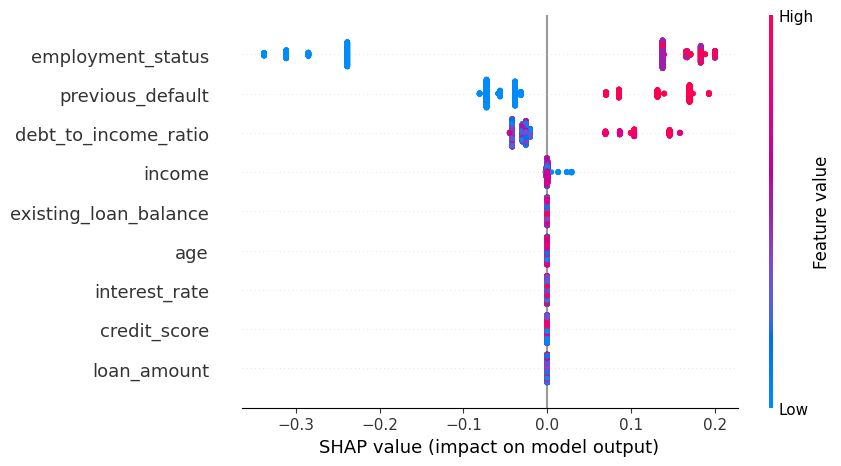

 99%|===================| 4433/4500 [00:52<00:00]       

In [ ]:
# SHAP Analysis
explainer_rf = shap.Explainer(best_rf, X_train, feature_names=selected_features)
shap_values_rf = explainer_rf(X_test)
class_labels = ['Low', 'Medium', 'High']
for i, label in enumerate(class_labels):
    print(f"\nSHAP Beeswarm for class: {label}")
    shap.plots.beeswarm(shap_values_rf[..., i], max_display=10)
explainer_xgb = shap.Explainer(best_xgb, X_train_scaled, feature_names=selected_features)
explainer_xgb = shap.Explainer(best_xgb, X_train, feature_names=selected_features)
shap_values_xgb = explainer_xgb(X_test)

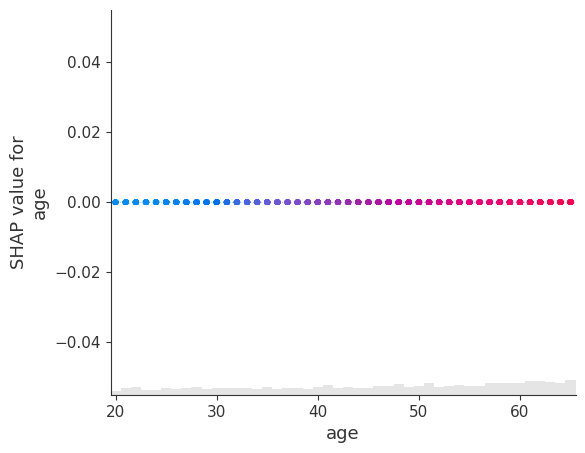

In [ ]:
# Plot how age impacts risk (for class 2 = High)
shap.plots.scatter(shap_values_xgb[..., 2][:, "age"], color=shap_values_xgb[..., 2][:, "income"])

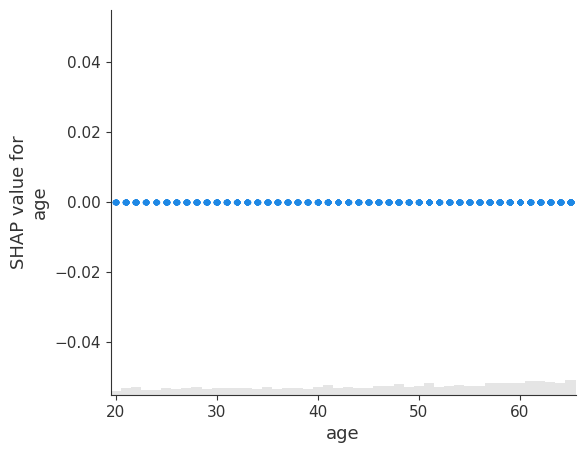

In [ ]:
# Low risk class
shap.plots.scatter(shap_values_xgb[..., 0][:, "age"])

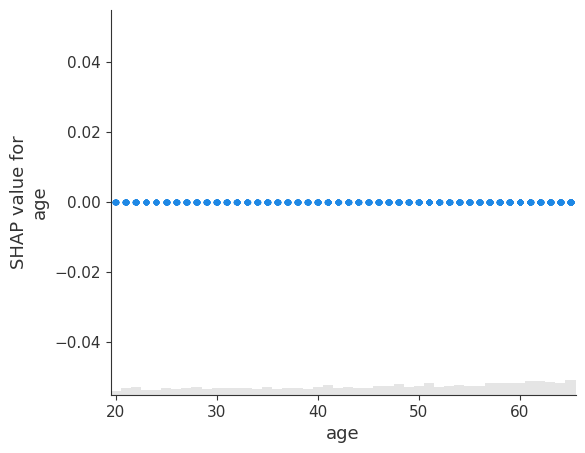

In [ ]:
# Medium risk class
shap.plots.scatter(shap_values_xgb[..., 1][:, "age"])

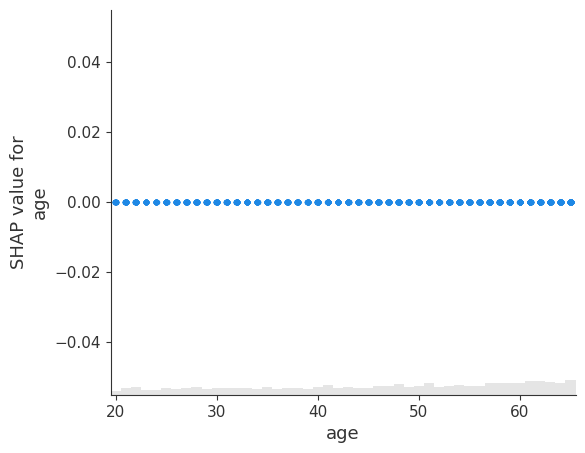

In [ ]:
# High risk class
shap.plots.scatter(shap_values_xgb[..., 2][:, "age"])

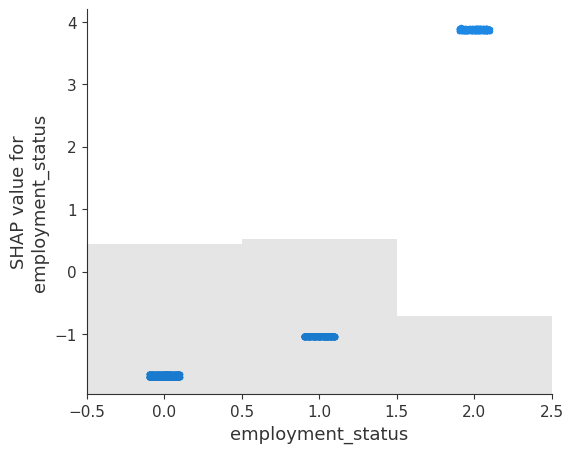

In [ ]:
# High risk class
shap.plots.scatter(shap_values_xgb[..., 2][:, "employment_status"])

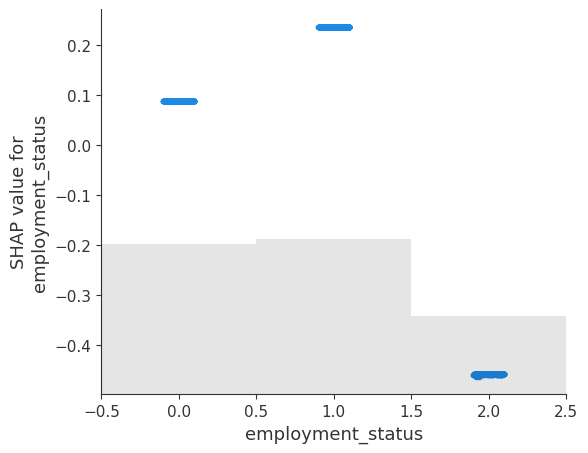

In [ ]:
# medium risk class
shap.plots.scatter(shap_values_xgb[..., 1][:, "employment_status"])

In [ ]:
# Export predictions
results_df = pd.DataFrame({
    'Actual': y_test.map({0: 'Low', 1: 'Medium', 2: 'High'}).values,
    'Predicted_RF': pd.Series(y_pred_rf).map({0: 'Low', 1: 'Medium', 2: 'High'}),
    'Predicted_XGB': pd.Series(y_pred_xgb).map({0: 'Low', 1: 'Medium', 2: 'High'})
})
results_df.to_csv("model_comparison_results.csv", index=False)
print("✅ Results saved to 'model_comparison_results.csv'")

✅ Results saved to 'model_comparison_results.csv'
